## Hierarchical Clustering

**Objectives**:
- Describe how hierarchical clustering algos work and apply to a dataset.
- Define and visualize dendrograms.

### Hierarchical clustering

Two main types:
- Divisive Clustering: Top-down approach. Start with all data in one cluster and break it down into more clusters based on siimilar traits.
- Agglomerative Clustering: Bottom-up approacch. All data points are their own cluster, and clusters are grouped together until there is only one cluster remaining.

These approaches can be visualized with a diagram called a **dendrogram**.

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine = pd.read_csv('https://assets.codingdojo.com/boomyeah2015/codingdojo/curriculum/content/chapter/1613254703__modified_wine.csv')
df = wine[['malic_acid', 'flavanoids']]
df.head()

,malic_acid,flavanoids
0,1.71,3.06
1,1.78,2.76
2,2.36,3.24
3,1.95,3.49
4,1.76,3.39


- Always scale data before performing distance-based modeling.

In [3]:
# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

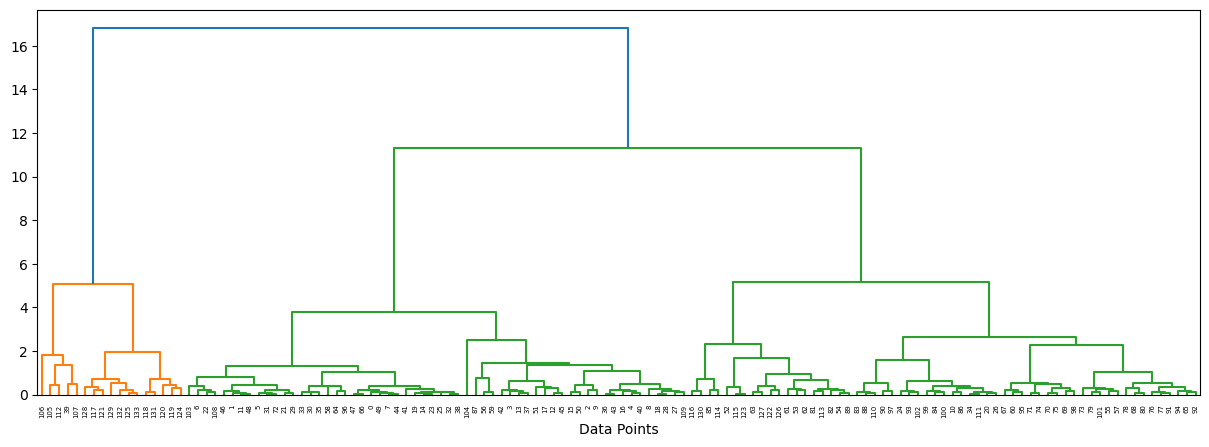

In [4]:
# Visualize Dendogram
plt.figure(figsize = (15, 5))
sch.dendrogram(sch.linkage(scaled_df, method = 'ward'))
plt.xlabel('Data Points');

**Choosing Clusters**

- The dendrogram can be used to choose the optimal number of clusters. To do this, look for where the vertical lines are on average the longest, and draw a line horizontaly through this space. This will give the number of clusters.
- In the above diagram, the longest vertical lines are present between ~6-11 on the y-axis, and a line through here, say at 8, will cross three lines, giving us three clusters.

## Hierarchical Clustering uses in Python

In [5]:
## Applying the hierarchical clustering algo in python

# Instantiate clustering
hc = AgglomerativeClustering(n_clusters=2)
hc.fit(scaled_df)

AgglomerativeClustering()

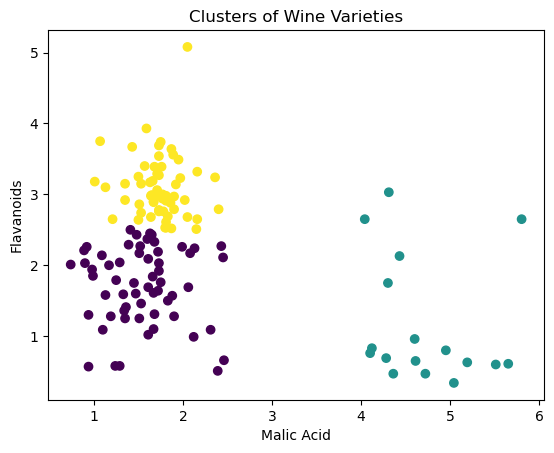

In [11]:
# Save the cluster lables to the dataframe 
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');

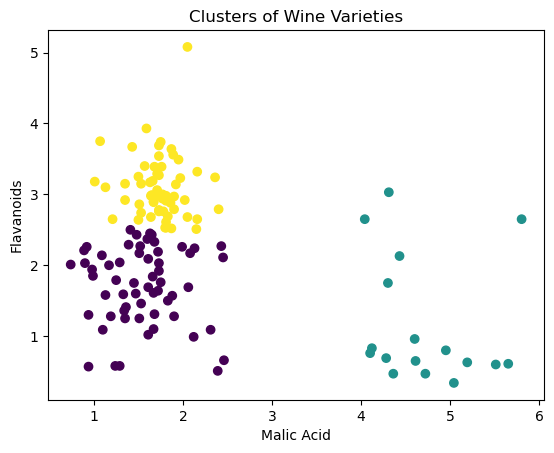

In [12]:
# Try the same thing with 3 clusters
hc = AgglomerativeClustering(n_clusters = 3)
hc.fit(scaled_df)
# Save the cluster lables to the dataframe 
df['cluster'] = hc.labels_
# Visualize the clusters
plt.scatter(df['malic_acid'], df['flavanoids'], c = df['cluster'])
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Clusters of Wine Varieties');